Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [8]:
# Combine your data
combined = pd.concat([train,test], ignore_index = True)

In [9]:
# check the shape of all the three datasets
train.shape, test.shape, combined.shape

((614, 13), (367, 12), (981, 13))

In [10]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [11]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Univariate Analysis

In [12]:
combined.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [13]:
# Plotting the Numerical variables

combined.select_dtypes(include = np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

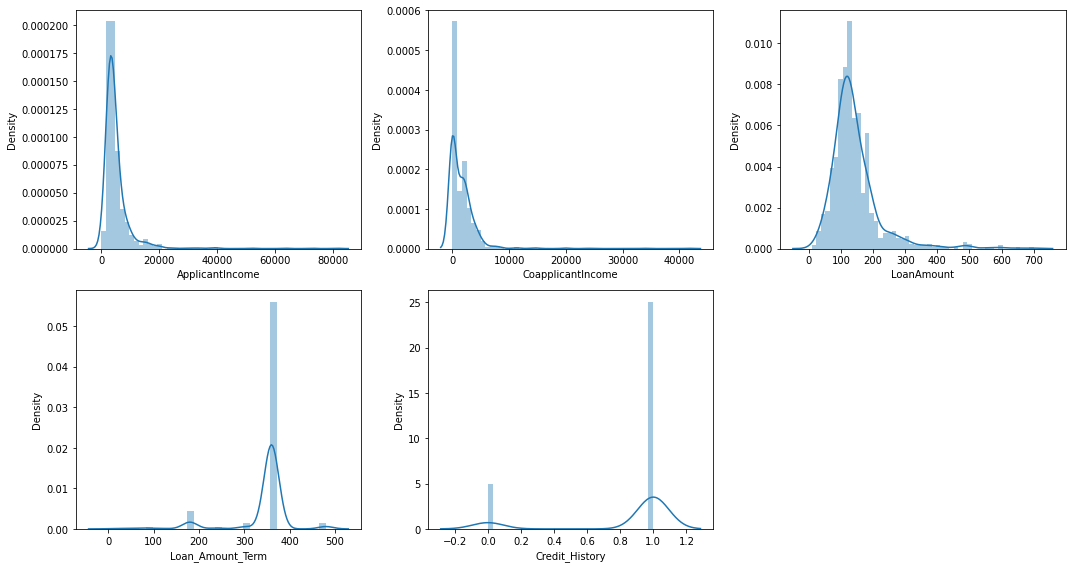

In [28]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

a = 2
b = 3
c = 1

plt.figure(figsize = [15,8])
for i in cols:
  plt.subplot(a,b,c)
  sns.distplot(combined.loc[:,i])
  plt.xlabel(i)
  c = c + 1
plt.tight_layout()
plt.show()

In [17]:
combined.select_dtypes(include = np.object).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

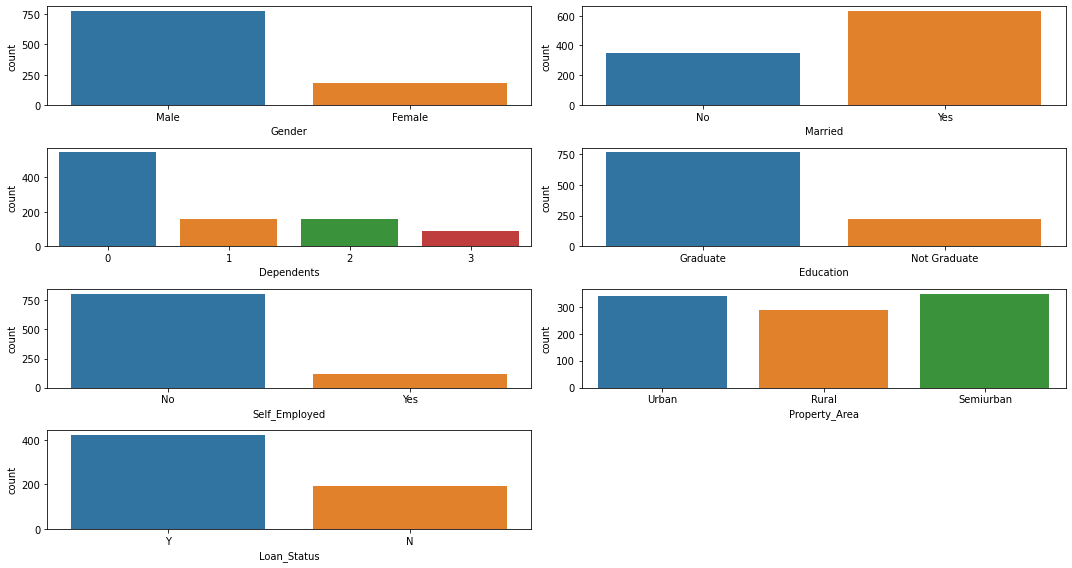

In [23]:
cat = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

a = 4
b = 2
c = 1

plt.figure(figsize = [15,8])
for i in cols:
  plt.subplot(a,b,c)
  sns.countplot(combined.loc[:,i])
  plt.xlabel(i)
  c = c + 1
plt.tight_layout()
plt.show()

### Inferences

* Males are more than females in the datasets
* Most are married
* most of them have no dependence
* cat shows 3+, we will convert it into 3
* Most of the loan appplicant are graduate and are salaried in the data
* the property collateral involved is Urban/Semiurban
* Most of the people have been granted loan

In [21]:
# replace 3+
combined.Dependents.replace(to_replace = '3+', value = '3', inplace = True)

In [22]:
# Fix the 3+ in dependents
combined.Dependents.value_counts()

0    545
1    160
2    160
3     91
Name: Dependents, dtype: int64

## Bivariate Analysis

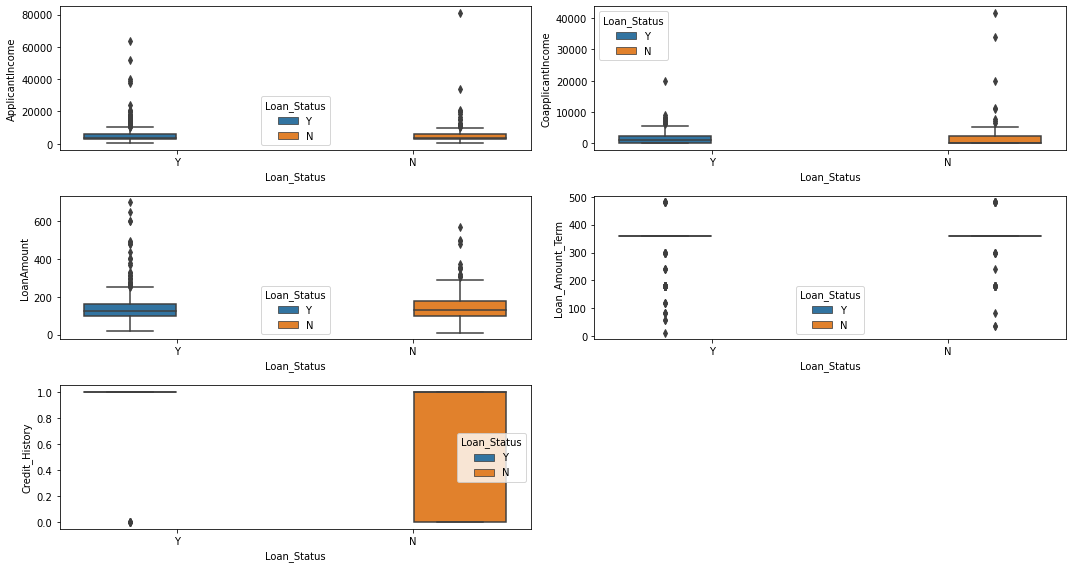

In [30]:
c = 1

plt.figure(figsize = [15,8])

for i in cols:
  plt.subplot(3,2,c)
  sns.boxplot(data=combined,x='Loan_Status',y=i,hue='Loan_Status')
  c+=1
plt.tight_layout()

In [31]:
combined.Loan_Amount_Term.describe()

count    961.000000
mean     342.201873
std       65.100602
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [33]:
combined.groupby('Loan_Status')['Loan_Amount_Term'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,186.0,344.064516,69.238921,36.0,360.0,360.0,360.0,480.0
Y,414.0,341.072464,63.247770,12.0,360.0,360.0,360.0,480.0


Loan Amount term will be replace by 360

In [37]:
combined.Loan_Amount_Term.fillna(360, inplace = True)

In [35]:
# Imputting mode in Loan_Amount_Term
combined.groupby('Loan_Status')['Credit_History'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,179.0,0.541899,0.499639,0.0,0.0,1.0,1.0,1.0
Y,385.0,0.981818,0.133782,0.0,1.0,1.0,1.0,1.0


Credit histroy will be replace by 1

In [42]:
# Imputting mode in credit History
val = combined.Credit_History.mode()[0]

combined.Credit_History.fillna(val,inplace = True)

In [38]:
combined.groupby('Loan_Status')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,181.0,151.220994,85.862783,9.0,100.0,129.0,176.0,570.0
Y,411.0,144.294404,85.484607,17.0,100.0,126.0,161.0,700.0


In [39]:
(129+126)/2

127.5

In [40]:
combined.LoanAmount.fillna(127.5, inplace =True)

In [44]:
combined.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

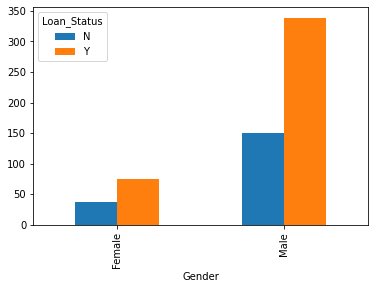

In [45]:
pd.crosstab(combined.Gender,
            combined.Loan_Status).plot(kind = 'bar')

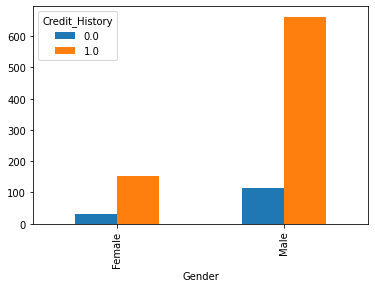

In [46]:
pd.crosstab(combined.Gender,
            combined.Credit_History).plot(kind = 'bar')

In [47]:
# Fill male in gender missing values
combined.Gender.fillna('Male', inplace = True)

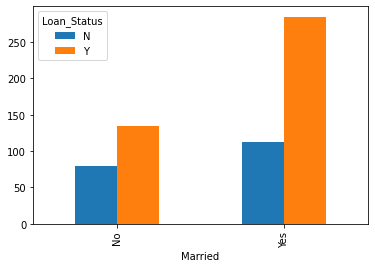

In [48]:
pd.crosstab(combined.Married,
            combined.Loan_Status).plot(kind = 'bar')

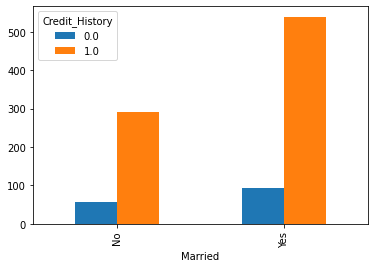

In [49]:
pd.crosstab(combined.Married,
            combined.Credit_History).plot(kind = 'bar')

In [50]:
# Fill Married in gender missing values
combined.Married.fillna('Yes', inplace = True)

In [51]:
combined.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

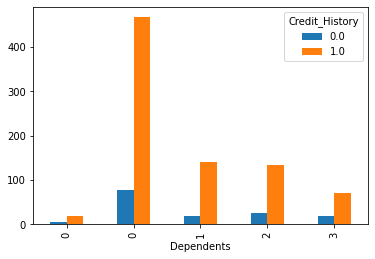

In [53]:
pd.crosstab(combined.Dependents,
            combined.Credit_History).plot(kind = 'bar')

In [52]:
# Fill Married in gender missing values
combined.Dependents.fillna(0, inplace = True)

In [54]:
combined.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

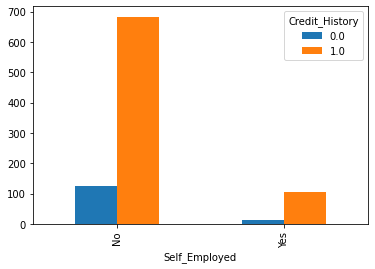

In [55]:
pd.crosstab(combined.Self_Employed,
            combined.Credit_History).plot(kind = 'bar')

In [56]:
# Fill Married in gender missing values
combined.Self_Employed.fillna('No', inplace = True)

In [57]:
combined.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [58]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


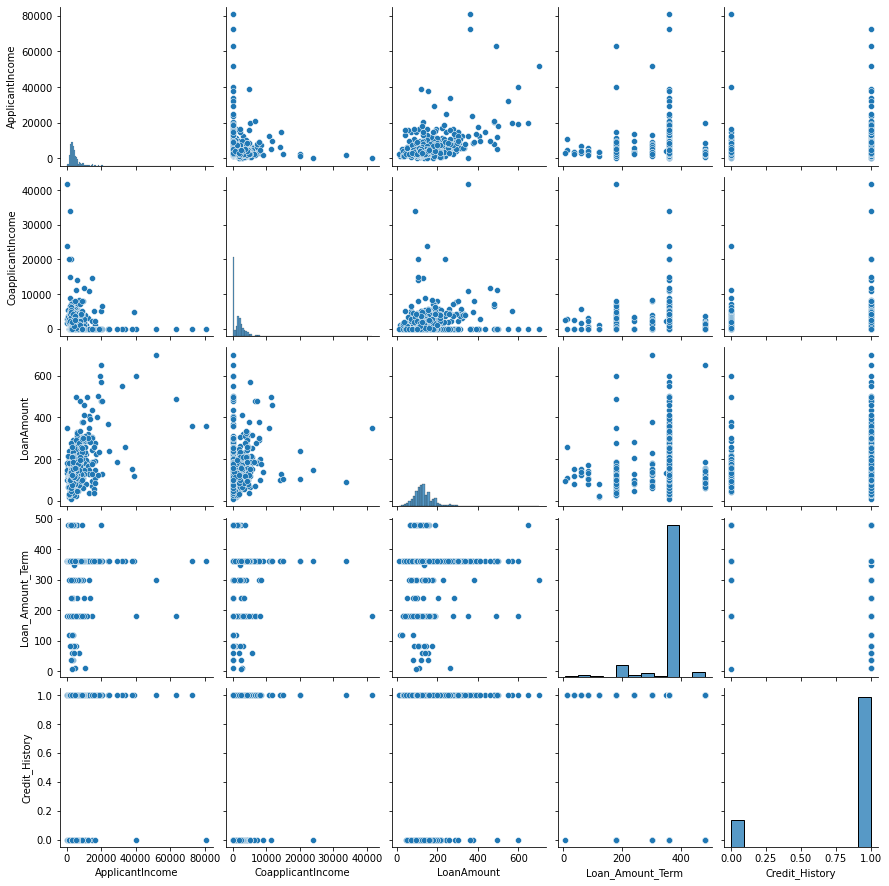

In [62]:
sns.pairplot(combined.loc[:,cols])

In [64]:
cluster_cols = ['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [65]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage
from scipy.spatial.distance import pdist

In [67]:
sc = StandardScaler()
scaled = sc.fit_transform(combined.loc[:, cluster_cols])

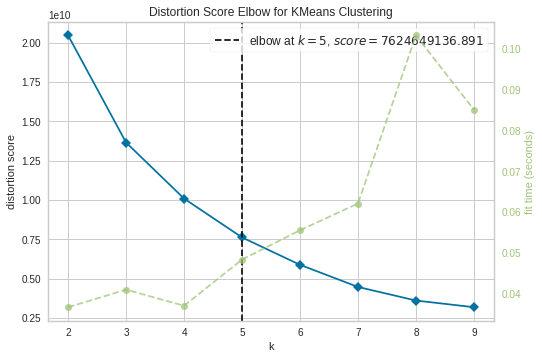

In [66]:
from yellowbrick.cluster import KElbowVisualizer

k_model = KMeans(random_state = 123)
visualizer = KElbowVisualizer(estimator = k_model, k = (2,10), random_state = 123)
visualizer.fit(combined.loc[:,cluster_cols])
visualizer.show()

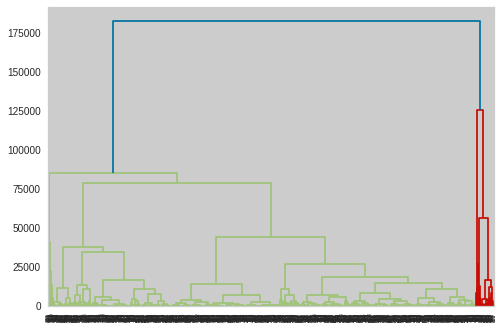

In [71]:
data = linkage(combined[cols], method = 'ward')
plots = dendrogram(data)
plt.show()

In [72]:
# Lets fit K means where the n_clusters  = 5

k = KMeans(n_clusters = 5, random_state = 123)
labels = k.fit_predict(combined.loc[:,cluster_cols])

In [73]:
combined['Klabels'] = labels

In [79]:
# Apply chi square test to verify the Feature

import scipy.stats as stats

# Ho: That the cluster Feature and the TGT Variable are independent
# Ha: That the cluster Feature and TGT are Related

df = pd.crosstab(combined.loc[0:train.shape[0]-1,'Klabels'],
                 combined.loc[0:train.shape[0]-1, 'Loan_Status'])
teststats, pvalue, df, exp_vals = stats.chi2_contingency(df)
print(pvalue)  # it is not significant

0.34338320737036176


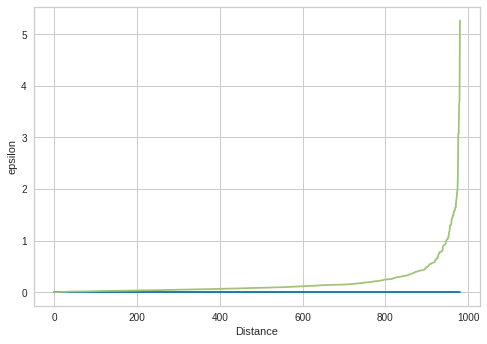

In [80]:
from sklearn.neighbors import NearestNeighbors
n = NearestNeighbors(n_neighbors = 2)
n.fit(scaled)
distance, indexes = n.kneighbors(scaled)

plt.plot(np.sort(distance, axis = 0))
plt.xlabel('Distance')
plt.ylabel('epsilon')
plt.show()

In [82]:
dbscan = DBSCAN(eps = 1, min_samples = len(combined.columns[:-2])+1)
labels = dbscan.fit_predict(scaled)

combined['d_labels'] = labels

In [83]:
df = pd.crosstab(combined.loc[0:train.shape[0]-1,'d_labels'],
                 combined.loc[0:train.shape[0]-1, 'Loan_Status'])
teststats, pvalue, df, exp_vals = stats.chi2_contingency(df)
print(pvalue)  # it is significant...

0.018085073924214302


In [86]:
# drop the loan id and klabel

new = combined.drop(['Loan_ID','Klabels'], axis = 1)

In [96]:
for i in cat[:-1]:
  df = pd.crosstab(combined.loc[0:train.shape[0]-1,i],
                 combined.loc[0:train.shape[0]-1, 'Loan_Status'])
  teststats, pvalue, df, exp_vals = stats.chi2_contingency(df)
  print(f'PValue for {i} var is {pvalue}')
  if pvalue < 0.05:
    print(f'{i} is significant')
    print('---------------------------------------------')
  else:
    print(f'{i} is significant')
    print('----------------------------------------------')

PValue for Gender var is 0.7391461310869638
Gender is significant
----------------------------------------------
PValue for Married var is 0.029608580862582116
Married is significant
---------------------------------------------
PValue for Dependents var is 0.4493740758719823
Dependents is significant
----------------------------------------------
PValue for Education var is 0.04309962129357355
Education is significant
---------------------------------------------
PValue for Self_Employed var is 0.9710746411403309
Self_Employed is significant
----------------------------------------------
PValue for Property_Area var is 0.0021360187811644937
Property_Area is significant
---------------------------------------------


In [97]:
df = pd.crosstab(combined.loc[0:train.shape[0]-1,'Credit_History'],
                 combined.loc[0:train.shape[0]-1, 'Loan_Status'])
teststats, pvalue, df, exp_vals = stats.chi2_contingency(df)
print(pvalue)  # it is significant...

3.4183499979091188e-40


In [108]:
new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels
0,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


In [100]:
new.Dependents.replace(0,'0', inplace = True)

In [101]:
new.groupby('Dependents')['CoapplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Dependents,,,,,,,,
0,570.0,1594.233544,2579.022617,0.0,0.0,1138.5,2403.75,33837.0
1,160.0,1558.762500,1711.654209,0.0,0.0,1500.0,2428.50,10968.0
2,160.0,1715.023750,2592.152875,0.0,0.0,1123.0,2083.00,20000.0
3,91.0,1527.043956,4621.431041,0.0,0.0,0.0,1719.00,41667.0


In [109]:
new['Family_Income'] = new['ApplicantIncome'] + new['CoapplicantIncome']

In [110]:
def incc(x):
  if(x<=20000):
    return('Low_Inc')
  elif(x<=40000):
    return('Medium_Inc')
  else:
    return('High_Inc')

In [111]:
new['Income_Cat'] = new.Family_Income.apply(incc)

In [113]:
df = pd.crosstab(new.loc[0:train.shape[0]-1,'Income_Cat'],
                 new.loc[0:train.shape[0]-1, 'Loan_Status'])
teststats, pvalue, df, exp_vals = stats.chi2_contingency(df)
print(pvalue)  # it is significant...

0.1874136802960824


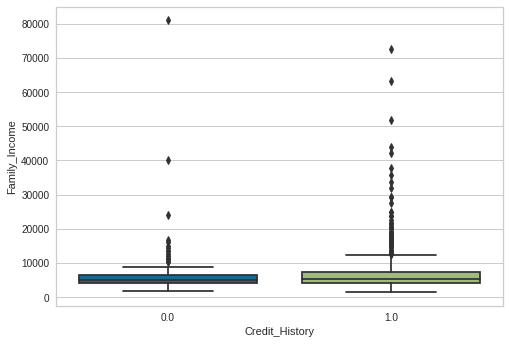

In [114]:
sns.boxplot(new.Credit_History,new.Family_Income)

In [115]:
new.groupby('Credit_History')['Family_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Credit_History,,,,,,,,
0.0,148.0,6583.250000,7455.015866,1830.0,4242.5,5049.5,6571.0,81000.0
1.0,833.0,6816.972293,5737.184908,1442.0,4136.0,5398.0,7453.0,72529.0


In [123]:
# Convert credit history 

new['Credit'] = new['Credit_History'].astype(int)

In [124]:
new['Credit'] = new['Credit'].astype('object')

In [133]:
new['Credit_Inc'] = new['Credit'].astype(str) + '_' + new['Income_Cat']

In [134]:
df = pd.crosstab(new.loc[0:train.shape[0]-1,'Credit_Inc'],
                 new.loc[0:train.shape[0]-1, 'Loan_Status'])
teststats, pvalue, df, exp_vals = stats.chi2_contingency(df)
print(pvalue)  

1.9062759582331185e-39


In [136]:
# significant features: married, 
new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels,Family_Income,Income_Cat,Credit,Credit_Inc
0,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0,5849.0,Low_Inc,1,1_Low_Inc
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0,Low_Inc,1,1_Low_Inc
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,3000.0,Low_Inc,1,1_Low_Inc
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,4941.0,Low_Inc,1,1_Low_Inc
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,6000.0,Low_Inc,1,1_Low_Inc


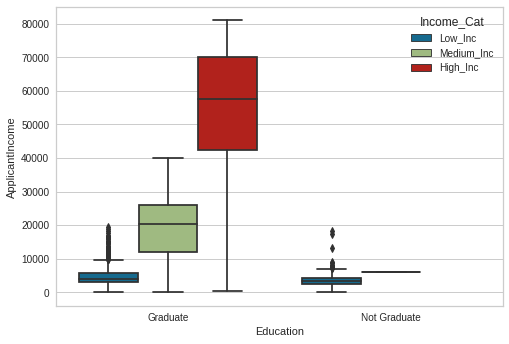

In [139]:
# check education with applicant income

sns.boxplot(x = 'Education', y = 'ApplicantIncome', data = new, hue = 'Income_Cat')

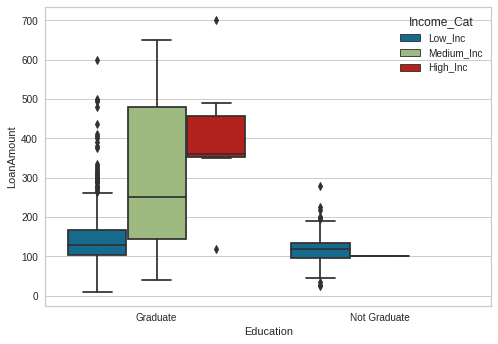

In [141]:
sns.boxplot(x = 'Education', y = 'LoanAmount', data = new, hue = 'Income_Cat')

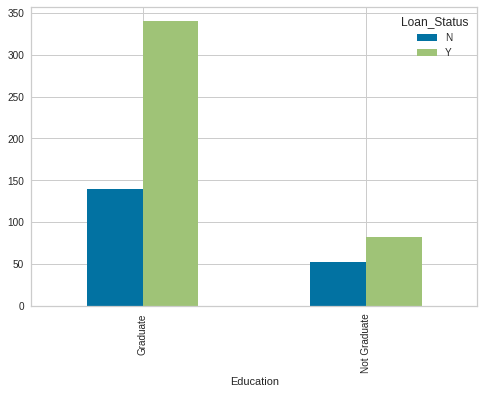

In [142]:
pd.crosstab(new.Education, new.Loan_Status).plot(kind = 'bar')

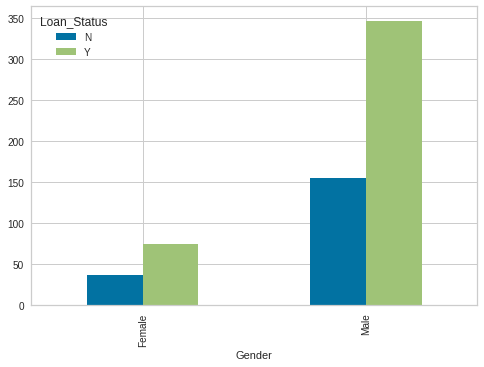

In [143]:
pd.crosstab(new.Gender, new.Loan_Status).plot(kind = 'bar')

In [144]:
# Drop the insignificant variable

new.head()  # Gender, Dependents, Credit

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels,Family_Income,Income_Cat,Credit,Credit_Inc
0,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0,5849.0,Low_Inc,1,1_Low_Inc
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0,Low_Inc,1,1_Low_Inc
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,3000.0,Low_Inc,1,1_Low_Inc
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,4941.0,Low_Inc,1,1_Low_Inc
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,6000.0,Low_Inc,1,1_Low_Inc


In [147]:
finaldf = new.drop(['Gender','Dependents','Credit','Income_Cat','ApplicantIncome','CoapplicantIncome'], axis = 1)

In [148]:
finaldf.head()

,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels,Family_Income,Credit_Inc
0,No,Graduate,No,127.5,360.0,1.0,Urban,Y,0,5849.0,1_Low_Inc
1,Yes,Graduate,No,128.0,360.0,1.0,Rural,N,0,6091.0,1_Low_Inc
2,Yes,Graduate,Yes,66.0,360.0,1.0,Urban,Y,0,3000.0,1_Low_Inc
3,Yes,Not Graduate,No,120.0,360.0,1.0,Urban,Y,0,4941.0,1_Low_Inc
4,No,Graduate,No,141.0,360.0,1.0,Urban,Y,0,6000.0,1_Low_Inc


In [149]:
# Split the Data in Train and Test

newtrain = finaldf.loc[0:train.shape[0]-1,:]

In [150]:
newtrain.shape, train.shape

((614, 11), (614, 13))

In [153]:
newtest = finaldf.loc[train.shape[0]:,]

In [154]:
newtest = newtest.drop('Loan_Status', axis = 1)

In [ ]:
#newtrain['NLoan_Status'] = newtrain['Loan_Status'].map({'Y':1, 'N':0})

In [155]:
newtrain.shape, newtest.shape

((614, 11), (367, 10))

### Model Building

In [156]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [159]:
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbor import KNearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [160]:
# K fold CV
from sklearn.model_selection import StratifiedKFold

In [161]:
# split the data in X and y

X = newtrain.drop('Loan_Status', axis = 1)
y = newtrain.Loan_Status

In [162]:
X = pd.get_dummies(X,drop_first = True)

In [170]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

kfold = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

# Logistic Regression
logreg = LogisticRegression()
pred_log = cross_val_score(logreg, X,y, cv = kfold)
pred_log_mean = pred_log.mean()


# Decision Tree
dtree = DecisionTreeClassifier()
pred_tree = cross_val_score(dtree, X,y, cv = kfold)
pred_tree_mean = pred_tree.mean()


# Random Forest
rf = RandomForestClassifier()
pred_rf = cross_val_score(rf, X,y, cv = kfold)
pred_rf_mean = pred_rf.mean()


# GradientBoosting
gbm = GradientBoostingClassifier()
pred_gbm = cross_val_score(gbm, X,y, cv = kfold)
pred_gbm_mean = pred_gbm.mean()


# CatBoost
cbc = CatBoostClassifier()
pred_cbc = cross_val_score(cbc, X,y, cv = kfold)
pred_cbc_mean = pred_cbc.mean()


# XGBoost
xgb = XGBClassifier()
pred_xgb = cross_val_score(xgb, X,y, cv = kfold)
pred_xgb_mean = pred_xgb.mean()


# Prepare the Report
d = {'Models' : ['LogReg', 'Tree', 'RF','GBM','CatBoost','XGBC'],
     'Scores': [pred_log_mean,pred_tree_mean,pred_rf_mean,pred_gbm_mean,
                pred_cbc_mean,pred_xgb_mean]}

model_perf = pd.DataFrame(d)

model_perf.sort_values(by = 'Scores', ascending = False)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6746198	total: 6.36ms	remaining: 1.26s
5:	learn: 0.6708219	total: 7.7ms	remaining: 1.27s
6:	learn: 0.6672693	total: 9.05ms	remaining: 1.28s
7:	learn: 0.6634485	total: 10.4ms	remaining: 1.29s
8:	learn: 0.6600118	total: 11.7ms	remaining: 1.29s
9:	learn: 0.6568456	total: 12.7ms	remaining: 1.26s
10:	learn: 0.6531766	total: 14.2ms	remaining: 1.28s
11:	learn: 0.6497607	total: 15.5ms	remaining: 1.28s
12:	learn: 0.6463904	total: 16.9ms	remaining: 1.28s
13:	learn: 0.6433778	total: 17.6ms	remaining: 1.24s
14:	learn: 0.6402110	total: 19ms	remaining: 1.24s
15:	learn: 0.6366045	total: 20.3ms	remaining: 1.25s
16:	learn: 0.6337431	total: 21.3ms	remaining: 1.23s
17:	learn: 0.6303602	total: 23ms	remaining: 1.26s
18:	learn: 0.6273890	total: 24.8ms	remaining: 1.28s
19:	learn: 0.6243758	total: 26.4ms	remaining: 1.29s
20:	learn: 0.6216191	total: 27.5ms	remaining: 1.28s
21:	learn: 0.6191555	total: 28.4ms	remaining: 1.26s
22:	learn: 0.6164813	tot

,Models,Scores
4,CatBoost,0.815994
5,XGBC,0.807797
0,LogReg,0.804585
3,GBM,0.793203
2,RF,0.788271
1,Tree,0.719885


In [172]:
newtest = pd.get_dummies(newtest, drop_first = True)

In [181]:
X.shape , newtest.shape

((614, 14), (367, 14))

In [179]:
newtest.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'd_labels',
       'Family_Income', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_Inc_0_Medium_Inc', 'Credit_Inc_1_High_Inc',
       'Credit_Inc_1_Low_Inc', 'Credit_Inc_1_Medium_Inc'],
      dtype='object')

In [176]:
X.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'd_labels',
       'Family_Income', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_Inc_0_Low_Inc', 'Credit_Inc_0_Medium_Inc',
       'Credit_Inc_1_High_Inc', 'Credit_Inc_1_Low_Inc',
       'Credit_Inc_1_Medium_Inc'],
      dtype='object')

In [180]:
X = X.drop('Credit_Inc_0_Low_Inc', axis = 1)

In [182]:
# Lets submit CatBoost

catboost = CatBoostClassifier()
pred = cbc.fit(X,y).predict(newtest)

Learning rate set to 0.008365
0:	learn: 0.6886690	total: 1.4ms	remaining: 1.39s
1:	learn: 0.6845538	total: 2.6ms	remaining: 1.3s
2:	learn: 0.6803985	total: 4.07ms	remaining: 1.35s
3:	learn: 0.6763753	total: 5.73ms	remaining: 1.43s
4:	learn: 0.6720632	total: 7.27ms	remaining: 1.45s
5:	learn: 0.6681654	total: 8.77ms	remaining: 1.45s
6:	learn: 0.6642128	total: 10.3ms	remaining: 1.45s
7:	learn: 0.6605147	total: 11.4ms	remaining: 1.42s
8:	learn: 0.6568571	total: 13ms	remaining: 1.43s
9:	learn: 0.6531358	total: 14.8ms	remaining: 1.46s
10:	learn: 0.6496935	total: 16.3ms	remaining: 1.47s
11:	learn: 0.6459500	total: 17.7ms	remaining: 1.46s
12:	learn: 0.6424697	total: 19.1ms	remaining: 1.45s
13:	learn: 0.6395283	total: 19.9ms	remaining: 1.4s
14:	learn: 0.6358892	total: 21.2ms	remaining: 1.39s
15:	learn: 0.6327443	total: 22.6ms	remaining: 1.39s
16:	learn: 0.6295649	total: 24.1ms	remaining: 1.39s
17:	learn: 0.6262953	total: 25.4ms	remaining: 1.38s
18:	learn: 0.6233147	total: 26.8ms	remaining: 1.38

In [183]:
solution = pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':pred})
solution.to_csv('CBC.csv', index = False)

In [184]:
cd

/root
